# Credit Scoring Model

## First lets get the data

In [1]:
#%pip install kagglehub #https://github.com/Kaggle/kagglehub

In [2]:
import kagglehub

/Users/andreaaustriagonzalez/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/andreaaustriagonzalez/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:


# Download latest version
#path = kagglehub.dataset_download("uciml/default-of-credit-card-clients-dataset")

#print("Path to dataset files:", path)

In [4]:
#% /Users/andreaaustriagonzalez/.cache/kagglehub/datasets/uciml/default-of-credit-card-clients-dataset/versions/1

In [5]:
#%pip install pandas

## Data Glossary

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly (on_time), 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

In [6]:
import pandas as pd
df=pd.read_csv("data/UCI_Credit_Card.csv")

In [7]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [8]:
#30,000 rows
#numeric: range, histogram [limit_BAL, age, ]
#sex, what that mean?
#education ""
# marriage ""
# age by groups?
# normalization?

import numpy as np

## Exploratory Data Analysis

In [9]:

n=df.shape[0]
print(f'{n} rows')


30000 rows


Column types

In [10]:
df.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [11]:
#%pip install matplotlib

Min 10000.0
Mode 50000.0
Mean 167484.32266666667
Max 1000000.0


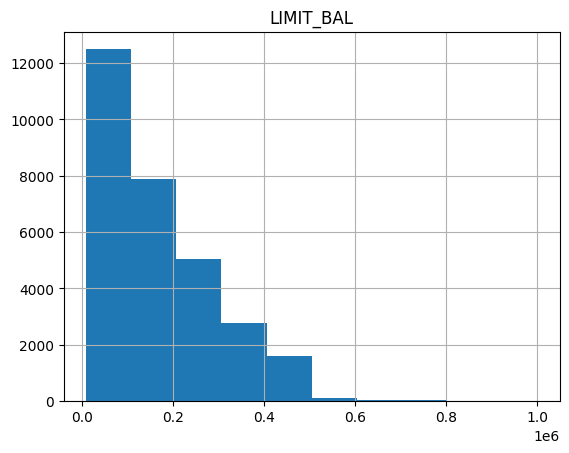

In [12]:
import matplotlib
df.hist(column='LIMIT_BAL',bins=10) #Limit Balance is in range [$10,000.0, $1'000,000.0)
print(f"Min {df['LIMIT_BAL'].min()}")# Min
print(f"Mode { df['LIMIT_BAL'].mode()[0]}")
print(f"Mean { df['LIMIT_BAL'].mean() }")# Mean
print(f"Max {df['LIMIT_BAL'].max()}")# Max

In [13]:
sex=df.groupby('SEX').count()['ID'] # Gender (1=male, 2=female)
# More females than males, which %?
# We need to change this to indicator function using one hot encoding

In [14]:
sex.index = ['Male','Female']

<Axes: title={'center': 'Sex Ratio'}, ylabel='ID'>

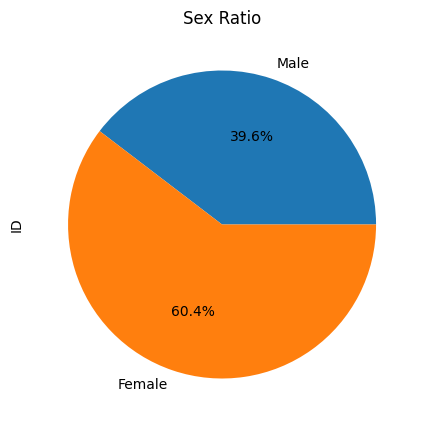

In [15]:
sex \
    .plot.pie(autopct='%.1f%%', figsize=(5, 5), title='Sex Ratio')

In [31]:
456/30000 # ~1%

0.0152

<Axes: xlabel='EDUCATION'>

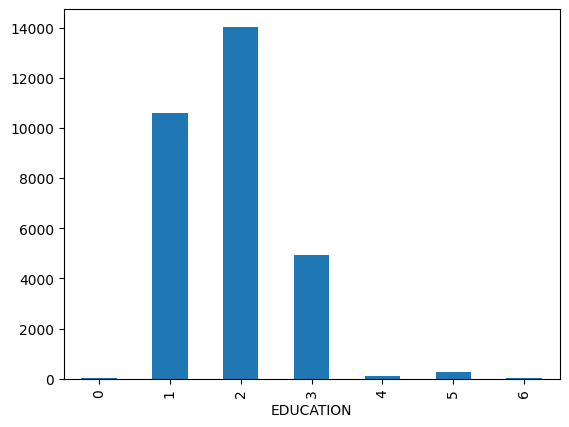

In [29]:
education=df.groupby('EDUCATION').count()['ID'] # 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown
# What we do with 0,4,5,6?
# We will be dropping 14+123+280+51=456 rows
#education=education.drop([0,4,5,6])}
#First let see the distribution of education
education.plot(kind='bar')


<Axes: xlabel='MARRIAGE'>

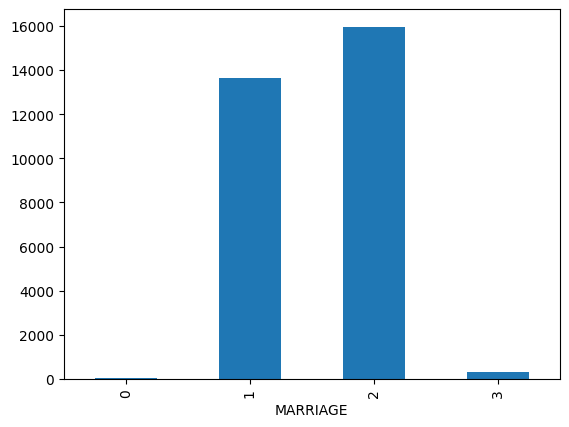

In [30]:
marriage=df.groupby('MARRIAGE').count()['ID'] # 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown
marriage.plot(kind='bar') # 1=married, 2=single, 3=others
# We need to drop 0, 3 probably
#df=df[df['MARRIAGE']!=0]


Min 21
Mode 29
Mean 35.4855
Max 79


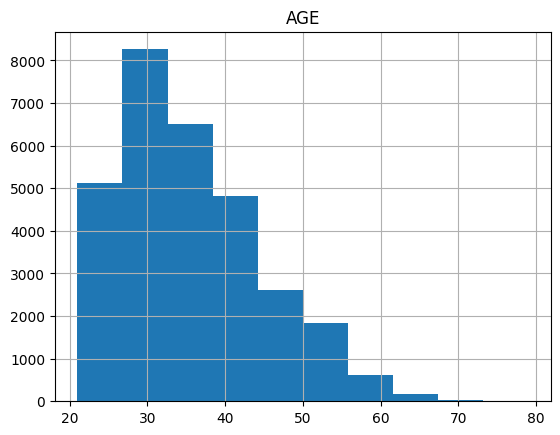

In [32]:
#AGE: Age in years

df.hist(column='AGE',bins=10) #Age is in range [21, 79]
print(f"Min {df['AGE'].min()}")# Min
print(f"Mode { df['AGE'].mode()[0]}")
print(f"Mean { df['AGE'].mean() }")# Mean
print(f"Max {df['AGE'].max()}")# Max

array([[<Axes: title={'center': 'PAY_0'}>]], dtype=object)

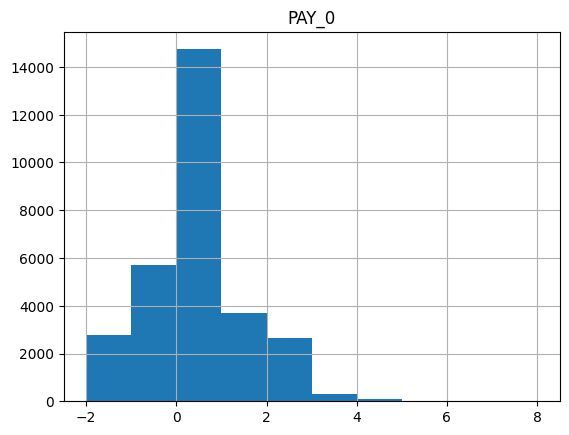

In [37]:
df.hist(column='PAY_0')

array([[<Axes: title={'center': 'PAY_2'}>]], dtype=object)

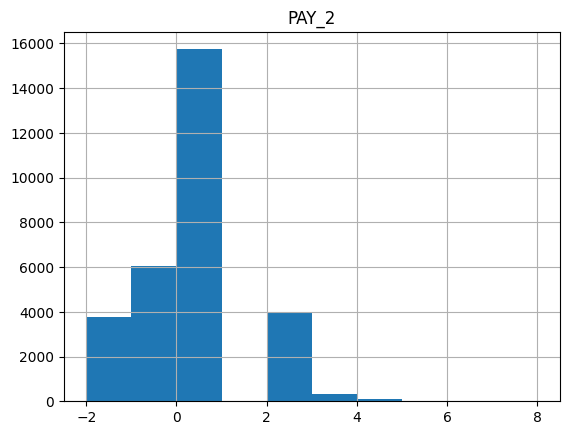

In [38]:
df.hist(column='PAY_2')

array([[<Axes: title={'center': 'PAY_3'}>]], dtype=object)

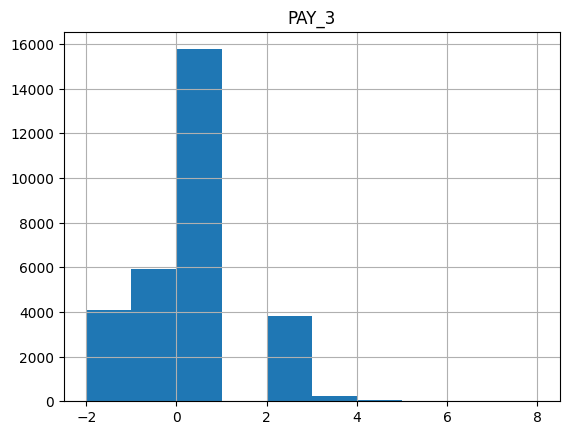

In [39]:
df.hist(column='PAY_3')

array([[<Axes: title={'center': 'PAY_4'}>]], dtype=object)

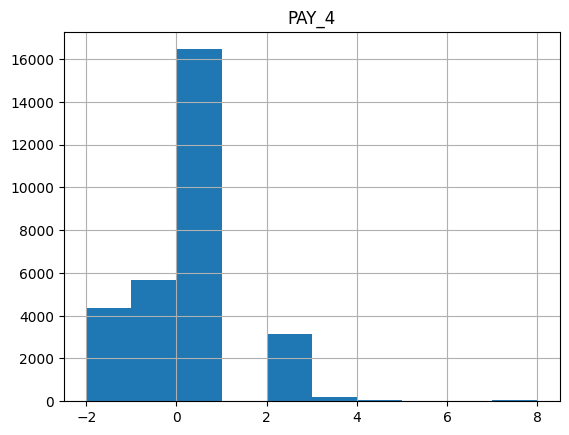

In [40]:
df.hist(column='PAY_4')

array([[<Axes: title={'center': 'PAY_5'}>]], dtype=object)

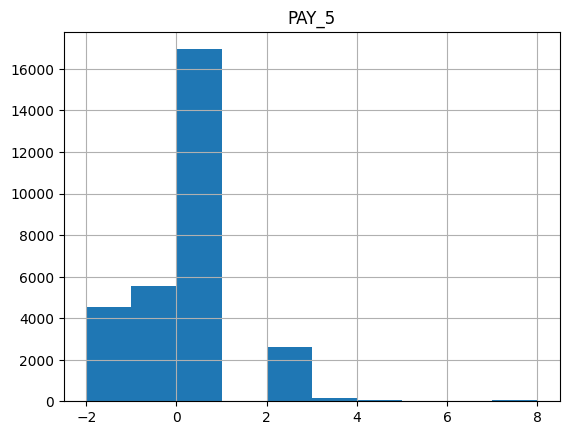

In [41]:
df.hist(column='PAY_5')

array([[<Axes: title={'center': 'PAY_6'}>]], dtype=object)

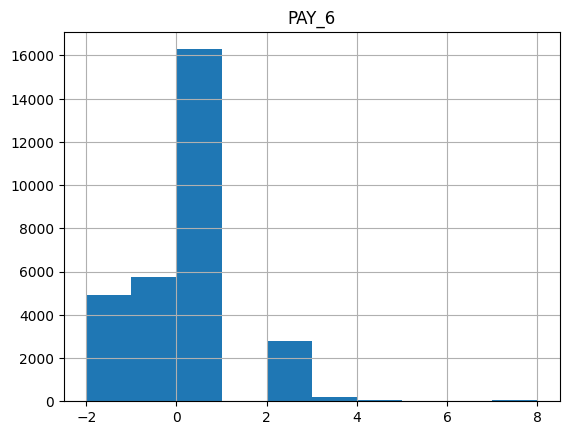

In [42]:
df.hist(column='PAY_6')

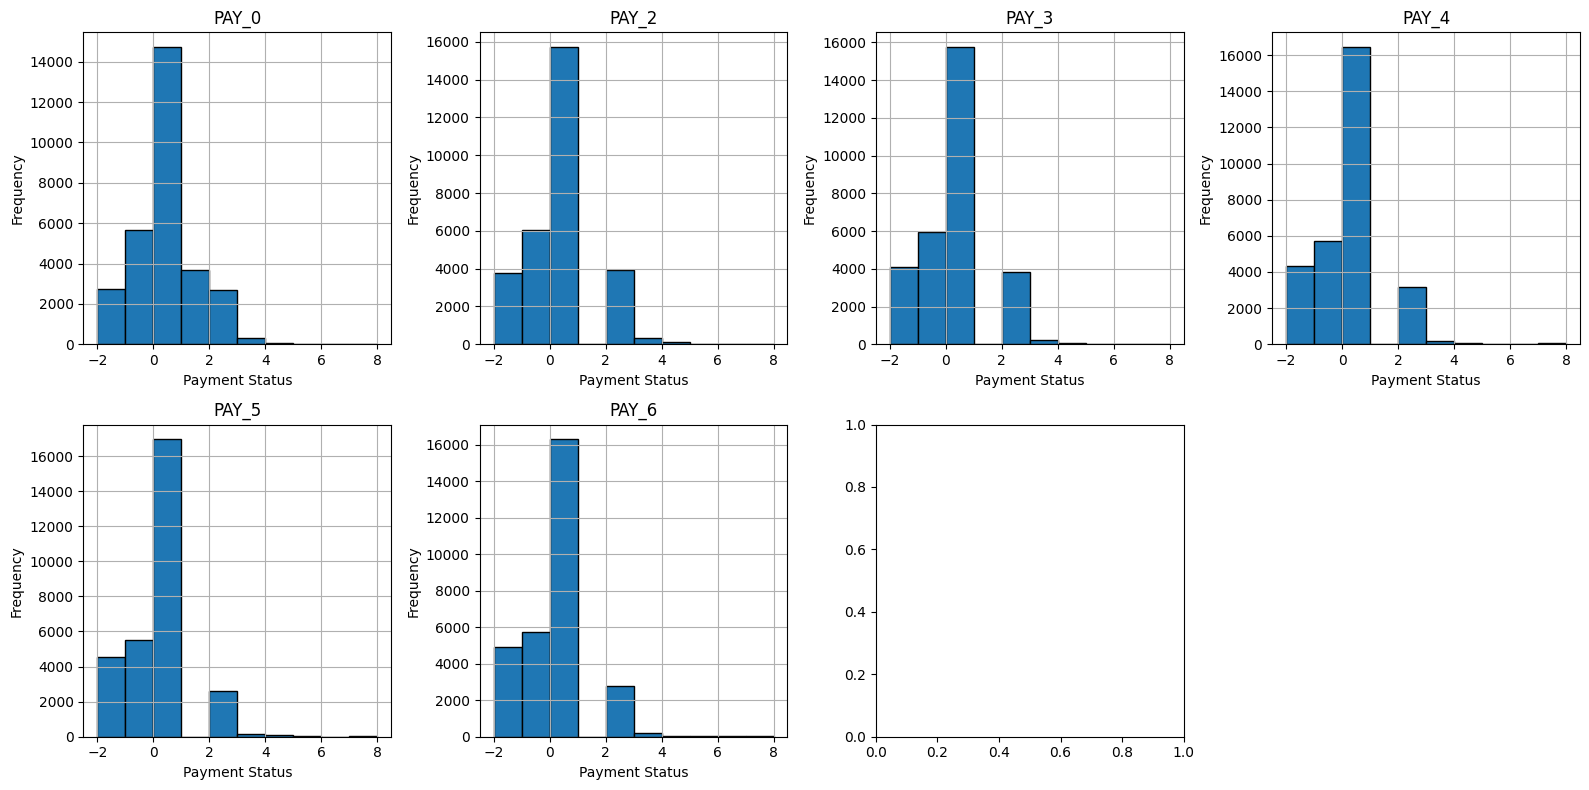

In [50]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']):
    df[col].hist(ax=axes[i], bins=10, edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel('Payment Status')
    axes[i].set_ylabel('Frequency')

axes[7].axis('off')
plt.tight_layout()
plt.show()